# Default of Credit Card Clients

**Descrioción de variables**


        ●	ID: ID of each client
        ●	LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
        ●	SEX: Gender (1=male, 2=female)
        ●	EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
        ●	MARRIAGE: Marital status (1=married, 2=single, 3=others)
        ●	AGE: Age in years
        ●	PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
        ●	PAY_2: Repayment status in August, 2005 (scale same as above)
        ●	PAY_3: Repayment status in July, 2005 (scale same as above)
        ●	PAY_4: Repayment status in June, 2005 (scale same as above)
        ●	PAY_5: Repayment status in May, 2005 (scale same as above)
        ●	PAY_6: Repayment status in April, 2005 (scale same as above)
        ●	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
        ●	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
        ●	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
        ●	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
        ●	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
        ●	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
        ●	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
        ●	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
        ●	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
        ●	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
        ●	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
        ●	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
        ●	default.payment.next.month: Default payment (1=yes, 0=no)


require 

- pip install pandas xlrd

In [111]:
import pandas as pd
import numpy as np


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import KMeansSMOTE, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
#from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# selección de características
from sklearn.feature_selection import SelectFromModel
# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, confusion_matrix, roc_auc_score, roc_curve
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [65]:
df = pd.read_excel('default of credit card clients.xls', skiprows=1, engine='xlrd')
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

observamos que existen 14 datos fuera de las especificasiones, asi com los valores no conocidos, ya que son pocos podemos proceder a eliminarlos. Veamos las siguinetes variables:

In [33]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Para la variable genero, no existen datos no especificados.

In [34]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

El estado civil contiene un valor no especificado, al igual que el nivel educativo, vamos a considerar eliminarlos, ya que son muy pocos.

In [35]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

**Removemos datos no especificados y datos desconocidos**

In [66]:
print(f"Total registros antes: {df.shape[0]}")
df = df[df['MARRIAGE']!=0]
df = df[~df['EDUCATION'].isin([0,5,6])]
print(f"Total registros después: {df.shape[0]}")

Total registros antes: 30000
Total registros después: 29601


**Pagos**

In [39]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Observamos que existen valores no especificados, y que el rango parece estar rezagado un periodo, ya que en la descripción menciona que va de -1 a 9, y los datos muestra un desface de -2 hasta 8, por lo cual vamos a considerar resolver este inconveniente de la siguinete manera: los valores menores a 0 se etiquetaran como -1, y os mayores o iguales a 0, se les sumará 1.

In [45]:
# función para corregir la escala
def correct_payments(df, columns):
    for p in columns:
        df.loc[df[p]<0, p] = -1
        df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
        df[p] = df[p].astype('int')
        
    return df

In [67]:
pay_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df = correct_payments(df, pay_features)
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.794770,0.666329,0.638492,0.591939,0.550894,0.520759
std,1.339224,1.397190,1.389153,1.350751,1.309342,1.325013
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


ya quedaron las escalas corregidas.

**Monto del Estado de Cuenta y Pago Anterior**

In [47]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29601.000000,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000
mean,50957.432012,48942.189554,4.680320e+04,43122.554204,40235.545184,38858.449816
std,73370.242404,70923.985151,6.912389e+04,64196.383913,60699.344884,59519.893043
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3528.000000,2970.000000,2.652000e+03,2329.000000,1780.000000,1278.000000
50%,22259.000000,21050.000000,2.003500e+04,19005.000000,18091.000000,17118.000000
75%,66623.000000,63497.000000,5.983000e+04,54271.000000,50072.000000,49121.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Parece no haber anomalías con respecto a las variables.


In [48]:

df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29601.000000,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000
mean,5649.560319,5.894788e+03,5198.415898,4828.659268,4795.032735,5181.326374
std,16568.264941,2.308919e+04,17580.914806,15711.057992,15244.217154,17657.260739
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.250000e+02,390.000000,298.000000,259.000000,138.000000
50%,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5005.000000,5.000000e+03,4500.000000,4014.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


Mismo caso, no se observan anomalias.

In [68]:
df.shape

(29601, 25)

# Análisis exploratorio

Vamos a revisar:

- balanceo de clase
- valores nulos
- distribución de los datos

**Valores faltantes**

Vemos que no existen valores faltantes



In [4]:
# valores 
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**Balanceo de clase**

No Default (0): 77.88% - No Default (1): 22.12%


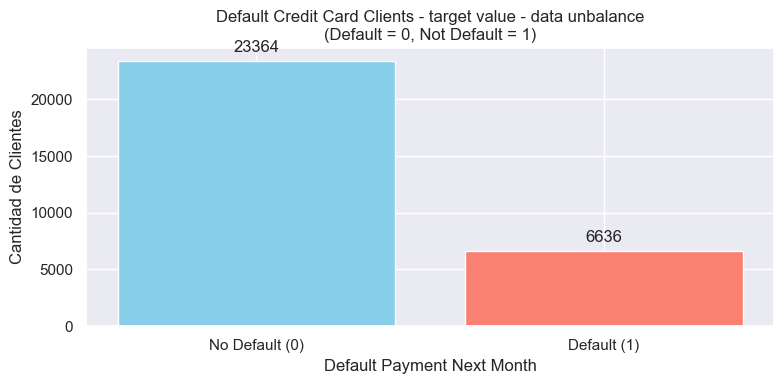

In [6]:
# Contar la variable objetivo
temp = df["default payment next month"].value_counts().sort_index()
labels = ['No Default (0)', 'Default (1)']
values = temp.values
# porcenatjes
total = temp.sum()
porcentajes = [f"{(v/total)*100:.2f}%" for v in values]
print(f"No Default (0): {porcentajes[0]} - No Default (1): {porcentajes[1]}")
# Crear gráfico de barras con matplotlib
plt.figure(figsize=(8, 4))
bars = plt.bar(labels, values, color=['skyblue', 'salmon'])

# Añadir título y etiquetas
plt.title('Default Credit Card Clients - target value - data unbalance\n(Default = 0, Not Default = 1)')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Cantidad de Clientes')

# Añadir los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, str(height),
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

Observamos que hay un desbalanceo severo, por lo cual sería recomendable emplear alguna técnica para trabajar con el desbalance de clase, ya que por lo general los modelos son sensibles al desbalance de clases.

**Límite de crédito**

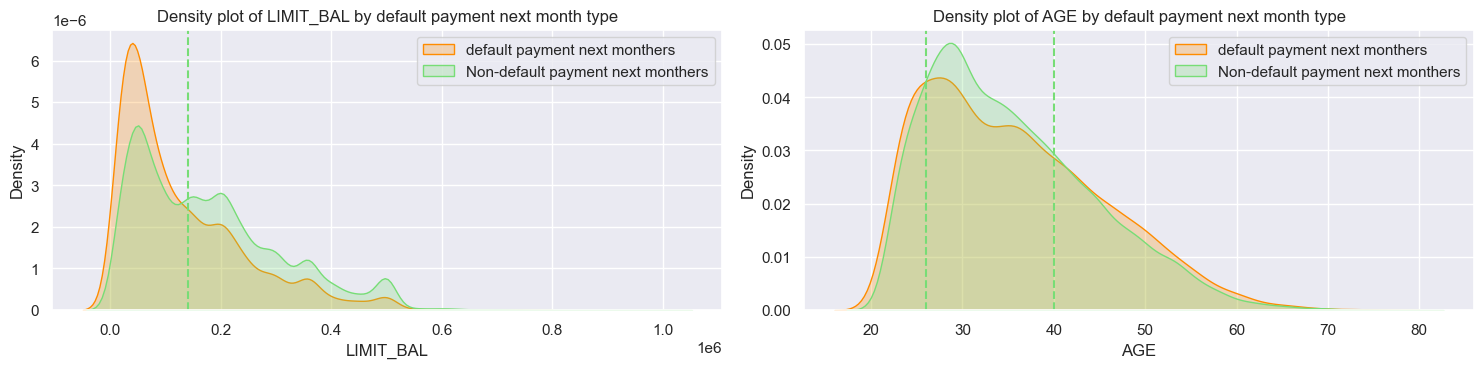

In [50]:
# Kernel density distribution
sns.set_palette(palette=['#77DD76','#FF6962'])
fig, axs = plt.subplots(1, 2, figsize=(15,4))

class_0 = df.loc[df['default payment next month'] == 0]['LIMIT_BAL']
class_1 = df.loc[df['default payment next month'] == 1]['LIMIT_BAL']
axs[0].set_title('Density plot of LIMIT_BAL by default payment next month type')
sns.kdeplot(class_1, fill=True, label='default payment next monthers', color='darkorange', ax=axs[0])
sns.kdeplot(class_0, fill=True, label='Non-default payment next monthers', ax=axs[0])
axs[0].axvline(0.14*1e6, 0, ls='--')
axs[0].legend()

class_0 = df.loc[df['default payment next month'] == 0]['AGE']
class_1 = df.loc[df['default payment next month'] == 1]['AGE']
axs[1].set_title('Density plot of AGE by default payment next month type')
sns.kdeplot(class_1, fill=True, label='default payment next monthers', color='darkorange', ax=axs[1])
sns.kdeplot(class_0, fill=True, label='Non-default payment next monthers', ax=axs[1])
axs[1].axvline(26, 0, ls='--')
axs[1].axvline(40, 0, ls='--')
axs[1].legend()

fig.tight_layout()
#plt.savefig('images/continuosDistribution.svg')
plt.show()

**Genero, estado civil, y nivel educativo**

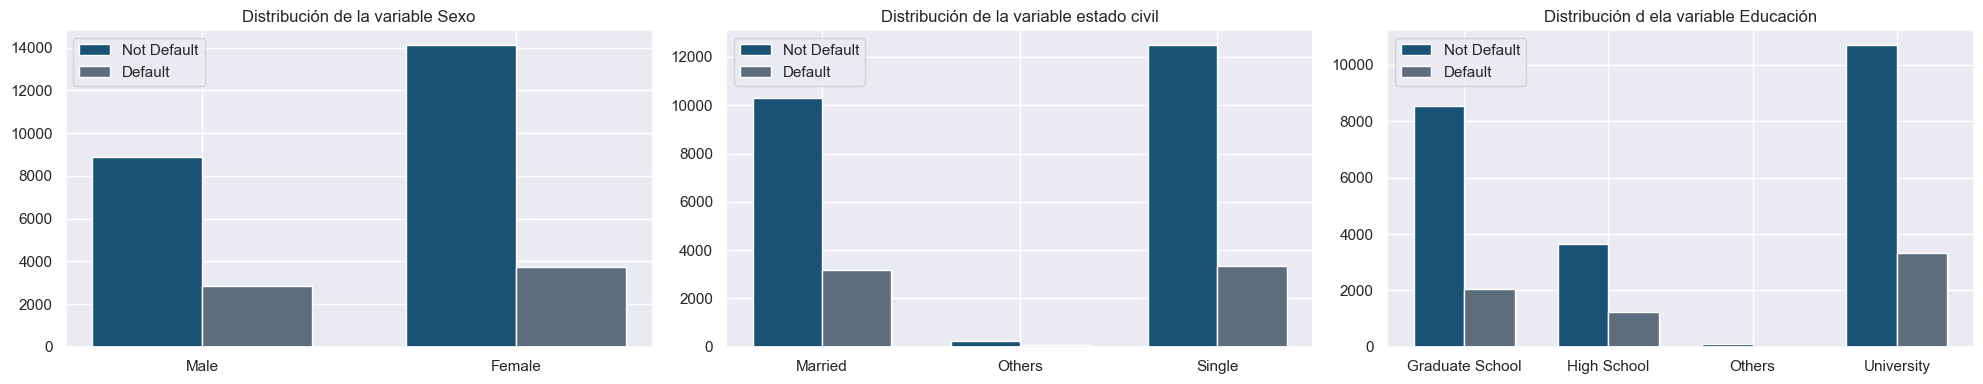

In [63]:

# Crear figura y ejes
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

# --- Gráfico 1: SEX ---
axs[0].set_title('Distribución de la variable Sexo')

# Obtener los datos para SEX
sex_counts = df.groupby(['SEX', 'default payment next month']).size().unstack(fill_value=0)
sex_labels = ['Male', 'Female']
x = range(len(sex_labels))
width = 0.35

axs[0].bar([i - width/2 for i in x], sex_counts[0], width=width, label='Not Default', color='#1a5276')
axs[0].bar([i + width/2 for i in x], sex_counts[1], width=width, label='Default', color='#5d6d7e')

axs[0].set_xticks(x)
axs[0].set_xticklabels(sex_labels)
axs[0].set_xlabel('')
axs[0].legend()

# --- Gráfico 3: MARRIAGE ---
axs[1].set_title('Distribución de la variable estado civil')

mar_labels = ['Married', 'Single', 'Others']
mar_map = {1: 'Married', 2: 'Single'}
df['MAR_CAT'] = df['MARRIAGE'].map(mar_map).fillna('Others')

mar_counts = df.groupby(['MAR_CAT', 'default payment next month']).size().unstack(fill_value=0)
x = range(len(mar_counts))

axs[1].bar([i - width/2 for i in x], mar_counts[0], width=width, label='Not Default', color='#1a5276')
axs[1].bar([i + width/2 for i in x], mar_counts[1], width=width, label='Default', color='#5d6d7e')

axs[1].set_xticks(x)
axs[1].set_xticklabels(mar_counts.index)
axs[1].set_xlabel('')
axs[1].legend()

# --- Gráfico 2: EDUCATION ---
axs[2].set_title('Distribución d ela variable Educación')

edu_labels = ['Graduate School', 'University', 'High School', 'Others']
edu_map = {1: 'Graduate School', 2: 'University', 3: 'High School'}
df['EDU_CAT'] = df['EDUCATION'].map(edu_map).fillna('Others')

edu_counts = df.groupby(['EDU_CAT', 'default payment next month']).size().unstack(fill_value=0)
x = range(len(edu_counts))

axs[2].bar([i - width/2 for i in x], edu_counts[0], width=width, label='Not Default', color='#1a5276')
axs[2].bar([i + width/2 for i in x], edu_counts[1], width=width, label='Default', color='#5d6d7e')

axs[2].set_xticks(x)
axs[2].set_xticklabels(edu_counts.index)
axs[2].set_xlabel('')
axs[2].legend()



# Ajustar diseño y guardar
fig.tight_layout()
plt.show()

**Pagos**

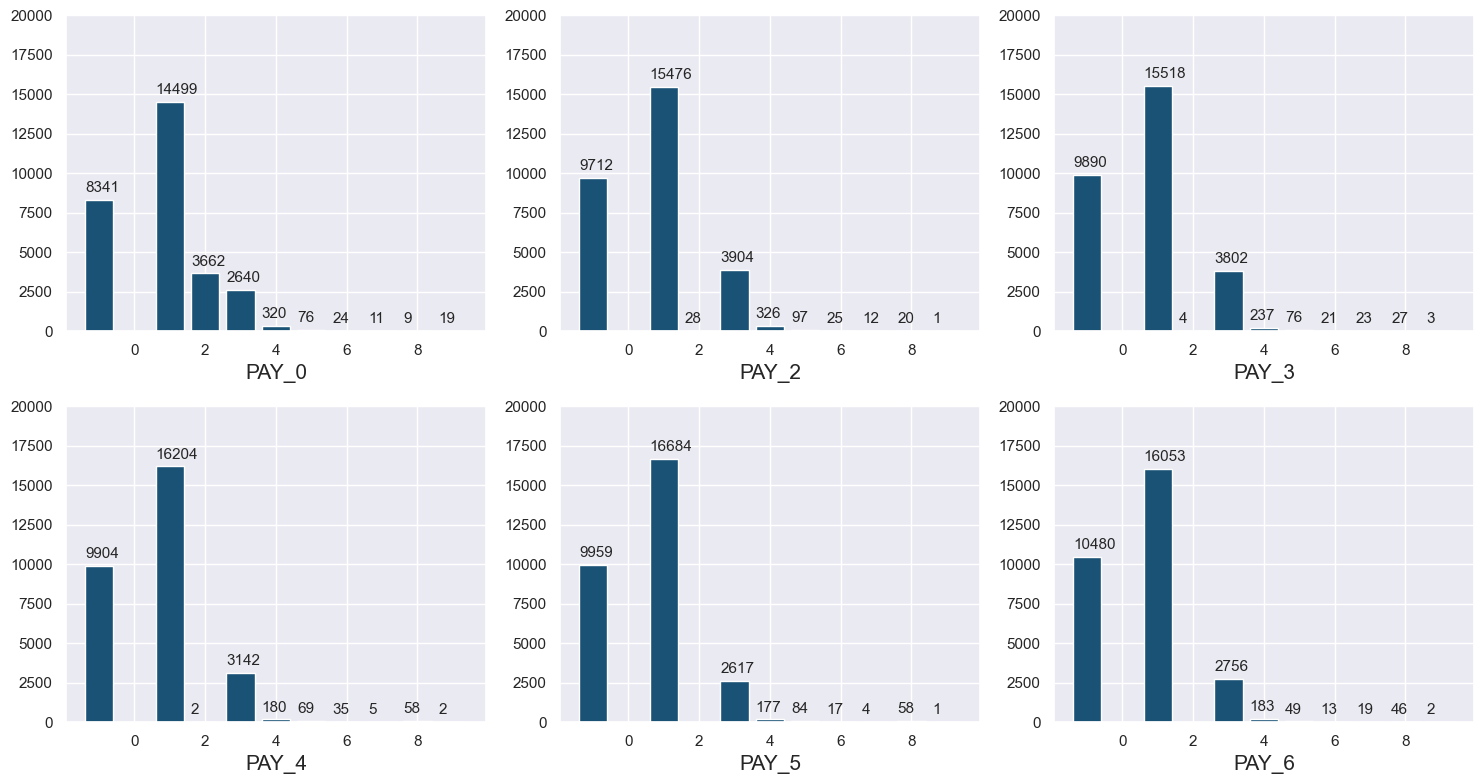

In [69]:
PAY_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15, 8))

for i, col in enumerate(PAY_cols):
    plt.subplot(2, 3, i + 1)

    # Contar los valores de la columna
    counts = df[col].value_counts().sort_index()
    x = counts.index
    y = counts.values

    # Crear gráfico de barras
    bars = plt.bar(x, y, color='#1a5276') 

    # Ajustes del gráfico
    plt.ylim(0, 20000)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('')
    plt.tight_layout()

    # Añadir etiquetas encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}', xy=(bar.get_x(), height + 500), fontsize=11)

# Guardar y mostrar figura
plt.show()

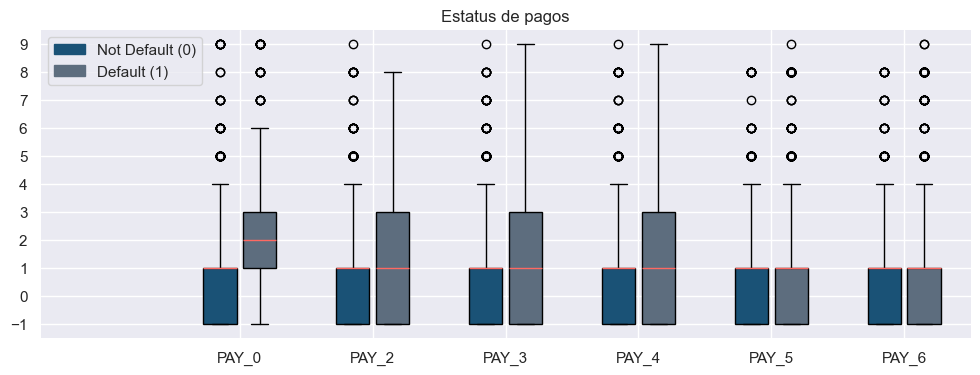

In [88]:
# Reorganizar datos como en el código original
repayment = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']]
repayment = pd.melt(repayment, 
                    id_vars="default payment next month",
                    var_name="Payment Status",
                    value_name='Delay (months)')

# Variables únicas
pay_statuses = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
defaults = sorted(repayment['default payment next month'].unique())


colors = ['#1a5276', '#5d6d7e']

# Crear figura
fig, ax = plt.subplots(figsize=(12, 4))

# Posiciones de cada grupo en el eje x
positions = []
labels = []
data_to_plot = []

# Construir las listas para cada grupo: (x, y)
for i, status in enumerate(pay_statuses):
    for j, default in enumerate(defaults):
        # Filtrar los valores para cada grupo
        group_data = repayment[(repayment['Payment Status'] == status) & (repayment['default payment next month'] == default)]['Delay (months)'].dropna()
        data_to_plot.append(group_data)
        positions.append(i + j * 0.3 - 0.15)  # separar un poco los grupos
        labels.append(f'{status}\n{default}')

# Dibujar boxplots
bp = ax.boxplot(data_to_plot, positions=positions, widths=0.25, patch_artist=True)

# Colorear cada caja
for patch, i in zip(bp['boxes'], range(len(bp['boxes']))):
    color_index = i % 2  # alternar entre los 2 valores de DEFAULT
    patch.set_facecolor(colors[color_index])
    patch.set_edgecolor('black')

# Ajustes del gráfico
ax.set_xticks(range(len(pay_statuses)))
ax.set_xticklabels(pay_statuses)
ax.set_xlim(-1.5, 5.5)
ax.set_ylim(-1.5, 9.5)
ax.set_yticks(np.arange(-1, 10))
ax.set_title('Estatus de pagos')

# Leyenda personalizada
from matplotlib.patches import Patch
legend_handles = [Patch(color=colors[0], label='Not Default (0)'),
                  Patch(color=colors[1], label='Default (1)')]
ax.legend(handles=legend_handles)

# Opcional: quitar borde del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Guardar y mostrar
plt.show()

El conjunto de características del estado de pago se muestra a continuación mediante diagramas de caja (boxplots). Se puede observar que los clientes que se retrasan en el pago por un mes o menos tienen menos incumplimientos en el pago de la tarjeta de crédito.

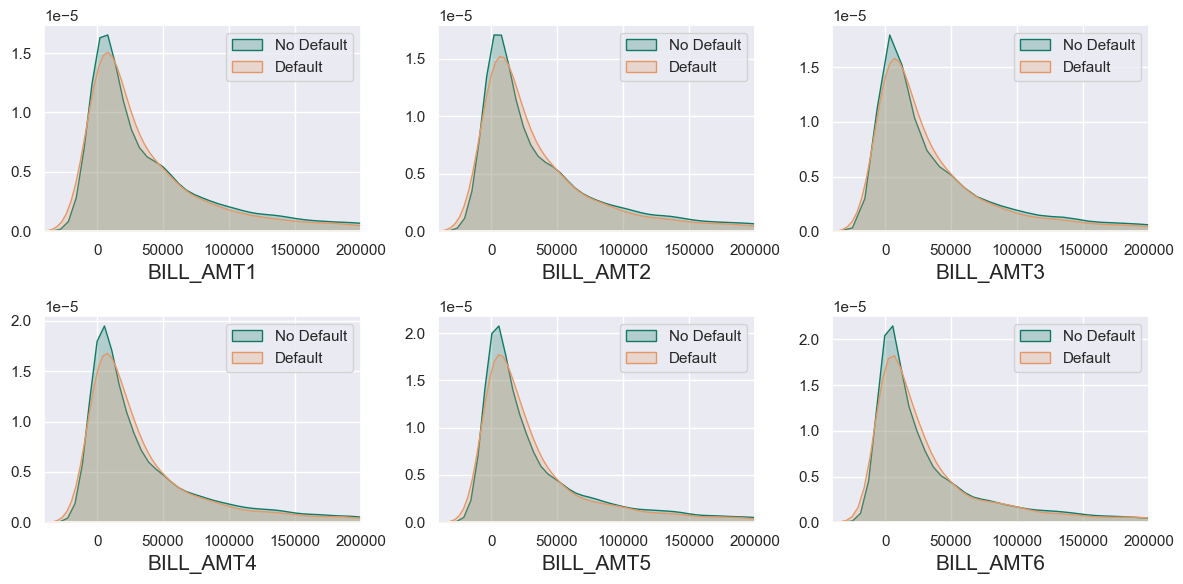

In [79]:
variables = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(variables):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['default payment next month'] == 0), col], label = 'No Default',color='#117a65', fill=True)
    sns.kdeplot(df.loc[(df['default payment next month'] == 1), col], label = 'Default', color='#e59866', fill=True)
    plt.xlim(-40000,200000)
    plt.ylabel('')
    plt.xlabel(col,fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.show()

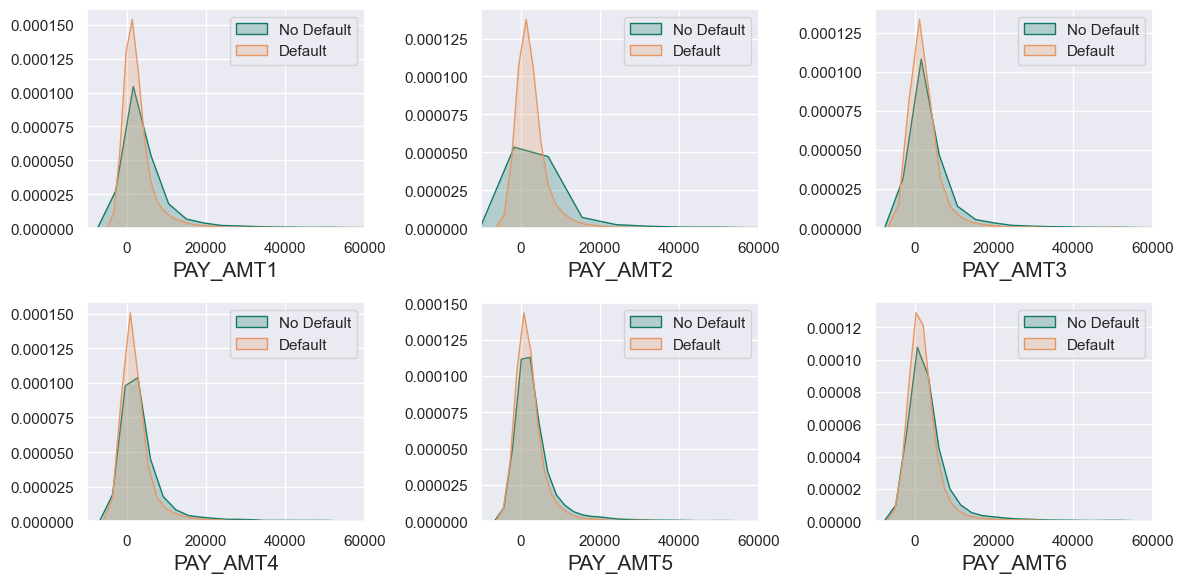

In [81]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):    
    plt.subplot(2,3,i + 1)    
    sns.kdeplot(df.loc[(df['default payment next month'] == 0), col], label = 'No Default', fill = True,color='#117a65')
    sns.kdeplot(df.loc[(df['default payment next month'] == 1), col], label = 'Default', fill = True, color='#e59866')
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
    
plt.show()

# Preprocesamiento

**Variables categóricas**

Las variables categóricas EDUCATION, SEX y MARRIAGE ya están codificadas con números enteros y podrían ser utilizadas directamente en un algoritmo de aprendizaje automático. Sin embargo, estas son variables nominales, por lo que asumir un orden entre sus valores sería subóptimo. 

In [90]:
# Convertir a variables dummy eliminando la primera categoría de cada variable
df = pd.get_dummies(df, columns=['EDUCATION', 'SEX', 'MARRIAGE'], 
                    prefix=['EDU', 'SEX', 'MAR'], drop_first=True)

# Mostrar las primeras filas para verificar
print(df.head())

   ID  LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0   1      20000   24      3      3     -1     -1     -1     -1       3913   
1   2     120000   26     -1      3      1      1      1      3       2682   
2   3      90000   34      1      1      1      1      1      1      29239   
3   4      50000   37      1      1      1      1      1      1      46990   
4   5      50000   57     -1      1     -1      1      1      1       8617   

   ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  EDU_2  \
0  ...         0         0         0                           1      1   
1  ...      1000         0      2000                           1      1   
2  ...      1000      1000      5000                           0      1   
3  ...      1100      1069      1000                           0      1   
4  ...      9000       689       679                           0      1   

   EDU_3  EDU_4  SEX_2  MAR_2  MAR_3  
0      0      0      1      0      0  
1 

**Partición en training and testing**

In [127]:
y = df['default payment next month']
X = df.drop(['default payment next month', 'ID'], axis=1)

# Random Forest

In [157]:
# Separar en train / validation / test ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, stratify=y_temp, random_state=42)
# Resultado: 60% train, 20% val, 20% test

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


# Pipeline con SMOTE y Scaler global 
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),  
    ('smote', SMOTE(random_state=42)),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
    ('classifier', RandomForestClassifier(random_state=42))
])

# GridSearchCV en conjunto de entrenamiento 
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\n Mejor score (CV - train):", grid_search.best_score_)
print(" Mejores parámetros encontrados:", grid_search.best_params_)

# === 7. Evaluación en validation set ===
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)


Train: (14504, 26), Validation: (6216, 26), Test: (8881, 26)
Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Mejor score (CV - train): 0.7918503726420141
 Mejores parámetros encontrados: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


C:\Users\HP\AppData\Local\Temp\ipykernel_22240\3326110482.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importances, x='importance', y='feature', palette='viridis')


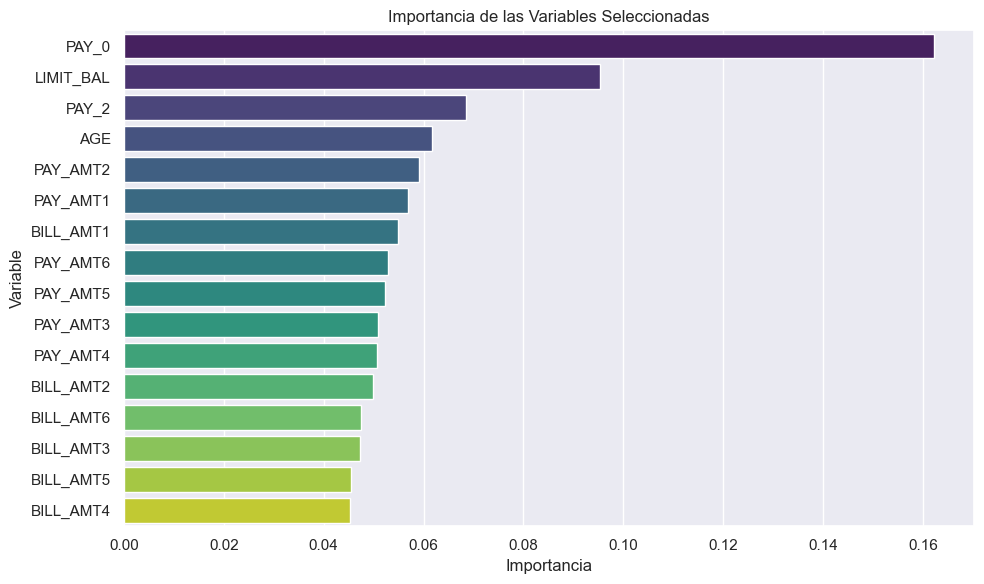

In [145]:
# Obtener el selector y el clasificador del pipeline 
selector = best_model.named_steps['feature_selection']
classifier = best_model.named_steps['classifier']

mask = selector.get_support()
selected_features = X.columns[mask]

# Importancia de las variables seleccionadas
importances = classifier.feature_importances_

# Crear DataFrame para graficar
feat_importances = pd.DataFrame({
    'feature': selected_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importances, x='importance', y='feature', palette='viridis')
plt.title('Importancia de las Variables Seleccionadas')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [158]:
print("\n Métricas en Validación:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1]))


 Métricas en Validación:
Accuracy: 0.7927927927927928
Precision: 0.5403422982885085
Recall: 0.47801009372746933
F1 Score: 0.5072685539403213
ROC AUC: 0.752434709009181


In [159]:
# Métricas para Test Final
print("\n Métricas en Test:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


 Métricas en Test:
Accuracy: 0.7847089291746425
Precision: 0.5198187995469988
Recall: 0.46316851664984865
F1 Score: 0.48986125933831376
ROC AUC: 0.7421165763651381


In [148]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      6899
           1       0.34      0.66      0.45      1982

    accuracy                           0.63      8881
   macro avg       0.60      0.64      0.59      8881
weighted avg       0.75      0.63      0.66      8881



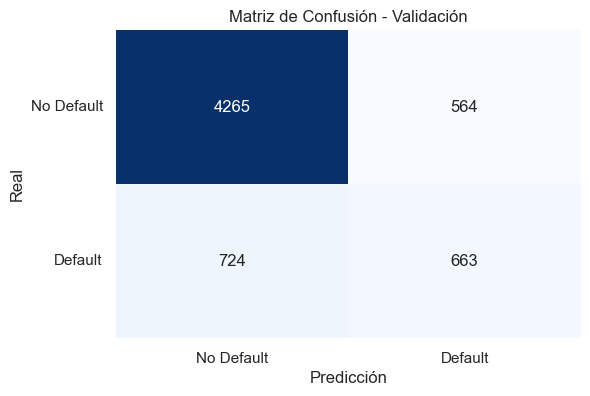

In [132]:
cm_val = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión - Validación")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks([0.5, 1.5], ['No Default', 'Default'])
plt.yticks([0.5, 1.5], ['No Default', 'Default'], rotation=0)
plt.show()

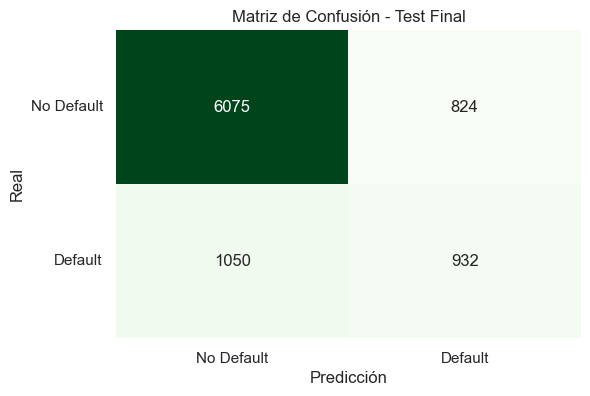

In [108]:
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Matriz de Confusión - Test Final")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks([0.5, 1.5], ['No Default', 'Default'])
plt.yticks([0.5, 1.5], ['No Default', 'Default'], rotation=0)
plt.show()

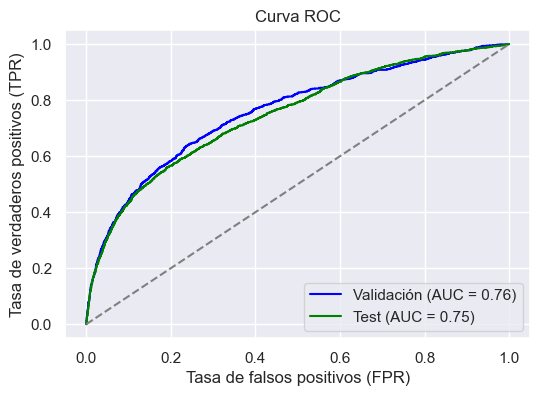

In [114]:
y_val_prob = best_model.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# === Curva ROC para TEST ===
y_test_prob = best_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# === Graficar ambas curvas ROC ===
plt.figure(figsize=(6, 4))
plt.plot(fpr_val, tpr_val, label=f'Validación (AUC = {roc_auc_val:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea diagonal
plt.title('Curva ROC')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Modelo 2 : Regresión Logística

In [135]:
from sklearn.linear_model import LogisticRegression

In [161]:
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('selector', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
])

# === 4. Definir parámetros para GridSearch ===
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'selector__estimator__C': [0.01, 0.1, 1, 10]
}

# === 5. Búsqueda de mejores parámetros ===
grid = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("\n Mejor score (CV - train):", grid.best_score_)
print(" Mejores parámetros encontrados:", grid.best_params_)

# Evaluación 
best_model = grid.best_estimator_
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)



 Mejor score (CV - train): 0.7225455287788339
 Mejores parámetros encontrados: {'classifier__C': 0.1, 'selector__estimator__C': 0.1}


In [162]:
print("\n Métricas en Validación:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1]))


 Métricas en Validación:
Accuracy: 0.6338481338481339
Precision: 0.3386569872958258
Recall: 0.67267483777938
F1 Score: 0.4505070014485756
ROC AUC: 0.7039278284899437


In [163]:
# Métricas para Test Final
print("\n Métricas en Test:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))


 Métricas en Test:
Accuracy: 0.6354014187591488
Precision: 0.33831101956745624
Recall: 0.6629667003027245
F1 Score: 0.4480054551653597
ROC AUC: 0.7125375297521146


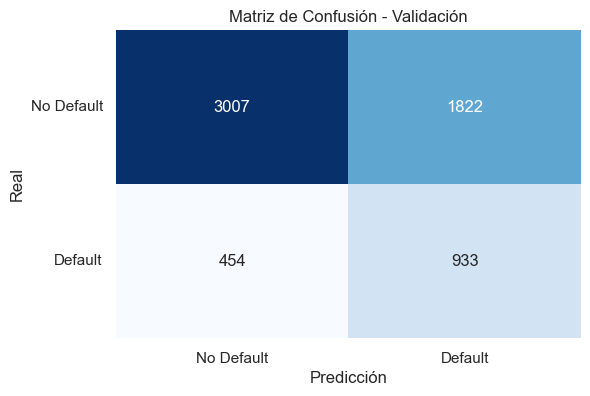

In [164]:
cm_val = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión - Validación")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks([0.5, 1.5], ['No Default', 'Default'])
plt.yticks([0.5, 1.5], ['No Default', 'Default'], rotation=0)
plt.show()

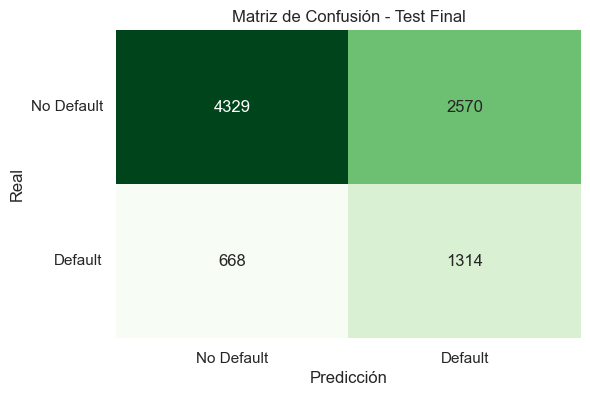

In [165]:
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Matriz de Confusión - Test Final")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks([0.5, 1.5], ['No Default', 'Default'])
plt.yticks([0.5, 1.5], ['No Default', 'Default'], rotation=0)
plt.show()

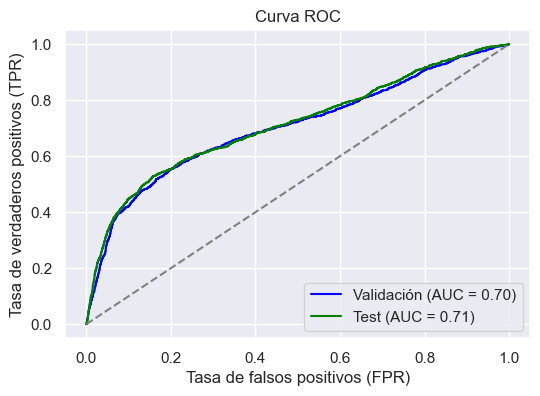

In [166]:
y_val_prob = best_model.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

# === Curva ROC para TEST ===
y_test_prob = best_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# === Graficar ambas curvas ROC ===
plt.figure(figsize=(6, 4))
plt.plot(fpr_val, tpr_val, label=f'Validación (AUC = {roc_auc_val:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea diagonal
plt.title('Curva ROC')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()